In [80]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

In [33]:
from tensorflow.examples.tutorials.mnist import input_data
#I've added "validation_size=0" parameter so that the image size will be exactly 60000 not 55000
fashion_mnist = input_data.read_data_sets('data/fashion', one_hot=True, validation_size=0, source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')


Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Extracting data/fashion\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Extracting data/fashion\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


#### Examine the data format, shape and labels

In [34]:
print('Features of Fashion MNIST dataset')
print('Shape of training set images: ', fashion_mnist.train.images.shape)
print('Shape of training set labels', fashion_mnist.train.labels.shape)
print('Shape of test set images: ', fashion_mnist.test.images.shape)
print('Shape of test set labels', fashion_mnist.test.labels.shape)

Features of Fashion MNIST dataset
Shape of training set images:  (60000, 784)
Shape of training set labels (60000, 10)
Shape of test set images:  (10000, 784)
Shape of test set labels (10000, 10)


#### Print the format of labels

In [35]:
print(fashion_mnist.train.labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#### So the labels are arrays of length 10, let's create an array to represent labels

In [36]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Try to show a sample image with the created label array element

The image is  Pullover
(28, 28)


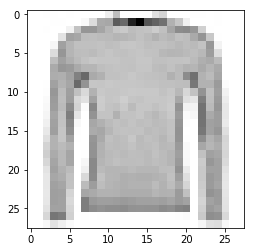

In [37]:
random_image = fashion_mnist.train.images[37].reshape(28, 28)
print('The image is ', labels[np.where(fashion_mnist.train.labels[37] == 1)[0][0]])
print(random_image.shape)
plt.imshow(random_image, cmap='Greys')
plt.show()

#### Create placeholder for network one. First network will be one layer network with only one neuron. ReLu is used for  

## Network 1 One hidden layer with one neuron

In [138]:
g = tf.Graph()
with g.as_default():
    
    X = tf.placeholder(dtype=tf.float32, shape=[None, 28*28]) #To feed input images whose shape are 28*28, None stands for 
                                                              # unspecified number of samples to be input
    Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])    #To feed labels whose shape are 10, None stands for 
                                                              # unspecified number of samples to be input

    #Create first hidden network
    #Declare the weights connecting the input to the hidden layer, it has 1000 nodes in the layer, weights are initialized using 
    #Xavier initializer
    W1 = tf.get_variable(name="W1", shape=[28*28, 10], dtype = tf.float32, initializer=tf.contrib.layers.xavier_initializer(30))
    #This is the bias 
    b1 = tf.get_variable(name="b1", shape=[10], dtype = tf.float32, initializer=tf.constant_initializer(0.1))
    # calculate the output of the hidden layer activation function is ReLu
    out1 = tf.nn.relu((tf.matmul(X, W1) + b1))
    
    #Output layer 
    W2 = tf.get_variable(name="W2", shape=[10, 10], dtype = tf.float32, initializer=tf.contrib.layers.xavier_initializer(30))
    b2 = tf.get_variable(name="b2", shape=[10], dtype = tf.float32, initializer=tf.constant_initializer(0.1))
    logits = tf.matmul(out1, W2) + b2
    
    #Accuracy
    preds = tf.argmax(logits, axis = 1)
    truth = tf.argmax(Y, axis = 1)
    match = tf.cast(tf.equal(preds, truth), tf.float32)
    acc = tf.reduce_mean(match)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=logits, labels=Y))
    
    step = tf.train.AdamOptimizer().minimize(loss)

In [144]:
sess = tf.InteractiveSession(graph=g)
tf.global_variables_initializer().run()

In [147]:
acc_list = []
epoch_list = []
batch_size = 1000
start_time = time.time()
for i in range(6000):
    x, y = fashion_mnist.train.next_batch(batch_size)
    _, acc_ = sess.run([step, acc], feed_dict={X: x, Y: y})    
    if i % 60 == 0: 
        epoch_list.append(i / 60)
        acc_list.append(acc_)
        print('%d) acc: %2.4f' % (i,acc_), end='\r')
processing_time = time.time() - start_time

In [148]:
print("--- %s seconds ---" % (processing_time))

--- 68.90869331359863 seconds ---


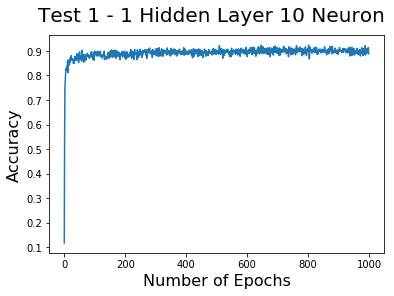

In [146]:
fig = plt.figure()
plt.plot(epoch_list, acc_list)
fig.suptitle('Test 1 - 1 Hidden Layer 10 Neuron', fontsize=20)
plt.xlabel('Number of Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
fig.savefig('test1.jpg')
plt.show()

In [142]:
#Test the network as a whole, not as batches
sess.run(acc, feed_dict={X:fashion_mnist.train.images, Y:fashion_mnist.train.labels})

0.87865

In [143]:
#Now test our trained network with the test data
sess.run(acc, feed_dict={X:fashion_mnist.test.images, Y:fashion_mnist.test.labels})

0.8536

# The second network - Shallow Network - One hidden layer with 100 neurons

In [149]:
g = tf.Graph()
with g.as_default():
    
    X = tf.placeholder(dtype=tf.float32, shape=[None, 28*28]) #To feed input images whose shape are 28*28, None stands for 
                                                              # unspecified number of samples to be input
    Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])    #To feed labels whose shape are 10 None stands for 
                                                              # unspecified number of samples to be input

    #Create first hidden network
    #Declare the weights connecting the input to the hidden layer, it has 1000 nodes in the layer, weights are initialized using 
    #Xavier initializer
    W1 = tf.get_variable(name="W1", shape=[28*28, 100], dtype = tf.float32, initializer=tf.contrib.layers.xavier_initializer(30))
    #This is the bias 
    b1 = tf.get_variable(name="b1", shape=[100], dtype = tf.float32, initializer=tf.constant_initializer(0.1))
    # calculate the output of the hidden layer activation function is ReLu
    out1 = tf.nn.relu((tf.matmul(X, W1) + b1))
    
    #Output layer 
    W2 = tf.get_variable(name="W2", shape=[100, 10], dtype = tf.float32, initializer=tf.contrib.layers.xavier_initializer(30))
    b2 = tf.get_variable(name="b2", shape=[10], dtype = tf.float32, initializer=tf.constant_initializer(0.1))
    logits = tf.matmul(out1, W2) + b2
    
    #Accuracy
    preds = tf.argmax(logits, axis = 1)
    truth = tf.argmax(Y, axis = 1)
    match = tf.cast(tf.equal(preds, truth), tf.float32)
    acc = tf.reduce_mean(match)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=logits, labels=Y))
    
    step = tf.train.AdamOptimizer().minimize(loss)

In [150]:
sess = tf.InteractiveSession(graph=g)
tf.global_variables_initializer().run()

In [151]:
acc_list = []
epoch_list = []
batch_size = 1000
start_time = time.time()
for i in range(6000):
    x, y = fashion_mnist.train.next_batch(batch_size)
    _, acc_ = sess.run([step, acc], feed_dict={X: x, Y: y})    
    if i % 60 == 0: 
        epoch_list.append(i / 60)
        acc_list.append(acc_)
        print('%d) acc: %2.4f' % (i,acc_), end='\r')
processing_time = time.time() - start_time

In [152]:
print("--- %s seconds ---" % (processing_time))

--- 128.16520047187805 seconds ---


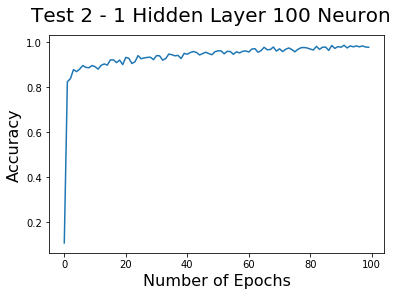

In [159]:
fig = plt.figure()
plt.plot(epoch_list, acc_list)
fig.suptitle('Test 2 - 1 Hidden Layer 100 Neuron', fontsize=20)
plt.xlabel('Number of Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
fig.savefig('test2.jpg')
plt.show()

In [154]:
#Test the network as a whole, not as batches
sess.run(acc, feed_dict={X:fashion_mnist.train.images, Y:fashion_mnist.train.labels})

0.9529833

In [155]:
#Now test our trained network with the test data
sess.run(acc, feed_dict={X:fashion_mnist.test.images, Y:fashion_mnist.test.labels})

0.8837

# The third network - Deep Network - Three hidden layers with 100 neurons

In [160]:
g = tf.Graph()
with g.as_default():
    
    X = tf.placeholder(dtype=tf.float32, shape=[None, 28*28]) #To feed input images whose shape are 28*28, None stands for 
                                                              # unspecified number of samples to be input
    Y = tf.placeholder(dtype=tf.float32, shape=[None, 10])    #To feed labels whose shape are 10 None stands for 
                                                              # unspecified number of samples to be input

    #Create 1st hidden network
    #Declare the weights connecting the input to the hidden layer, it has 1000 nodes in the layer, weights are initialized using 
    #Xavier initializer
    W1 = tf.get_variable(name="W1", shape=[28*28, 100], dtype = tf.float32, initializer=tf.contrib.layers.xavier_initializer(30))
    #This is the bias 
    b1 = tf.get_variable(name="b1", shape=[100], dtype = tf.float32, initializer=tf.constant_initializer(0.1))
    # calculate the output of the hidden layer activation function is ReLu
    out1 = tf.nn.relu((tf.matmul(X, W1) + b1))
    
    #Create 2nd hidden network
    #Declare the weights connecting the input to the hidden layer, it has 100 nodes in the layer, weights are initialized using 
    #Xavier initializer
    W2 = tf.get_variable(name="W2", shape=[100, 100], dtype = tf.float32, initializer=tf.contrib.layers.xavier_initializer(30))
    #This is the bias 
    b2 = tf.get_variable(name="b2", shape=[100], dtype = tf.float32, initializer=tf.constant_initializer(0.1))
    # calculate the output of the hidden layer activation function is ReLu
    out2 = tf.nn.relu((tf.matmul(out1, W2) + b2))
    
    #Create 3rd hidden network
    #Declare the weights connecting the input to the hidden layer, it has 100 nodes in the layer, weights are initialized using 
    #Xavier initializer
    W3 = tf.get_variable(name="W3", shape=[100, 100], dtype = tf.float32, initializer=tf.contrib.layers.xavier_initializer(30))
    #This is the bias 
    b3 = tf.get_variable(name="b3", shape=[100], dtype = tf.float32, initializer=tf.constant_initializer(0.1))
    # calculate the output of the hidden layer activation function is ReLu
    out3 = tf.nn.relu((tf.matmul(out2, W3) + b3))
    
    #Output layer 
    W4 = tf.get_variable(name="W4", shape=[100, 10], dtype = tf.float32, initializer=tf.contrib.layers.xavier_initializer(30))
    b4 = tf.get_variable(name="b4", shape=[10], dtype = tf.float32, initializer=tf.constant_initializer(0.1))
    logits = tf.matmul(out3, W4) + b4
    
    #Accuracy
    preds = tf.argmax(logits, axis = 1)
    truth = tf.argmax(Y, axis = 1)
    match = tf.cast(tf.equal(preds, truth), tf.float32)
    acc = tf.reduce_mean(match)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=logits, labels=Y))
    
    step = tf.train.AdamOptimizer().minimize(loss)

In [161]:
sess = tf.InteractiveSession(graph=g)
tf.global_variables_initializer().run()

In [162]:
acc_list = []
epoch_list = []
batch_size = 1000
start_time = time.time()
for i in range(6000):
    x, y = fashion_mnist.train.next_batch(batch_size)
    _, acc_ = sess.run([step, acc], feed_dict={X: x, Y: y})    
    if i % 60 == 0: 
        epoch_list.append(i / 60)
        acc_list.append(acc_)
        print('%d) acc: %2.4f' % (i,acc_), end='\r')
processing_time = time.time() - start_time

In [167]:
print("--- %s seconds ---" % (processing_time))

--- 164.49411344528198 seconds ---


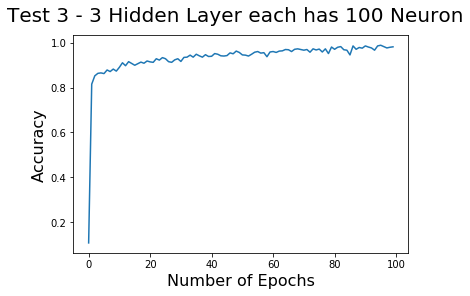

In [164]:
fig = plt.figure()
plt.plot(epoch_list, acc_list)
fig.suptitle('Test 3 - 3 Hidden Layer each has 100 Neuron', fontsize=20)
plt.xlabel('Number of Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
fig.savefig('test3.jpg')
plt.show()

In [168]:
#Test the network as a whole, not as batches
sess.run(acc, feed_dict={X:fashion_mnist.train.images, Y:fashion_mnist.train.labels})

0.97858334

In [169]:
#Now test our trained network with the test data
sess.run(acc, feed_dict={X:fashion_mnist.test.images, Y:fashion_mnist.test.labels})

0.8786